# Packages and Data Load

Loading packages and data

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv('./tamim_t20_jan_2020_stat_cricinfo.csv', index_col='date', parse_dates=True)

# EDA

Data Overview

In [3]:
# top 10 entries
df.head(10)

,runs,opposition,ground
date,,,
2007-01-09,11,Kenya,Nairobi (Gym)
2007-02-09,1,Pakistan,Nairobi (Gym)
2007-09-13,10,West Indies,Johannesburg
2007-09-15,8,South Africa,Cape Town
2007-09-16,32,Australia,Cape Town
2007-09-18,3,Sri Lanka,Johannesburg
2007-09-20,3,Pakistan,Cape Town
2008-04-20,23,Pakistan,Karachi
2008-05-11,25,South Africa,Johannesburg


In [4]:
# last 10 entries
df.tail(10)

,runs,opposition,ground
date,,,
2018-05-06,43,Afghanistan,Dehradun
2018-07-06,5,Afghanistan,Dehradun
2018-07-31,0,West Indies,Basseterre
2018-04-08,74,West Indies,Lauderhill
2018-05-08,21,West Indies,Lauderhill
2018-12-17,5,West Indies,Sylhet
2018-12-20,15,West Indies,Dhaka
2018-12-22,8,West Indies,Dhaka
2020-01-24,39,Pakistan,Lahore


Data type check and conversion

In [5]:
df.info();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 2007-01-09 to 2020-01-25
Data columns (total 3 columns):
runs          77 non-null int64
opposition    77 non-null object
ground        77 non-null object
dtypes: int64(1), object(2)
memory usage: 2.4+ KB


In [0]:
df['opposition'] = df.opposition.astype('category')
df['ground'] = df.ground.astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 2007-01-09 to 2020-01-25
Data columns (total 3 columns):
runs          77 non-null int64
opposition    77 non-null category
ground        77 non-null category
dtypes: category(2), int64(1)
memory usage: 3.6 KB


Stastistical EDA

In [8]:
df.opposition.value_counts()

Pakistan        14
West Indies     13
Zimbabwe         7
Sri Lanka        7
India            7
New Zealand      6
Ireland          5
South Africa     4
Afghanistan      4
Netherlands      3
Australia        2
Scotland         1
Oman             1
Nepal            1
Kenya            1
Hong Kong        1
Name: opposition, dtype: int64

In [9]:
df.ground.value_counts()

Dhaka              16
Colombo (RPS)       6
Lahore              5
Chattogram          4
The Hague           3
Khulna              3
Belfast             3
Cape Town           3
Dehradun            3
Dharamsala          3
Johannesburg        3
Basseterre          3
Kolkata             2
Sylhet              2
Lauderhill          2
Mount Maunganui     2
Nairobi (Gym)       2
Nottingham          2
Bulawayo            2
Pallekele           2
Karachi             1
Hamilton            1
Gros Islet          1
Lord's              1
Napier              1
Bengaluru           1
Name: ground, dtype: int64

Graphical EDA

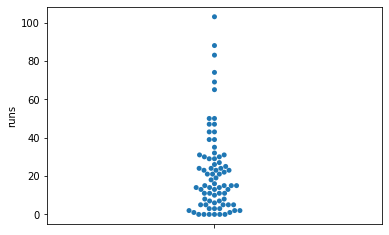

In [10]:
sns.swarmplot(y='runs', data=df)
plt.show()

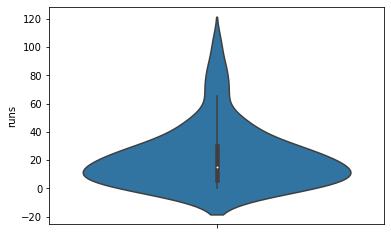

In [11]:
sns.violinplot(y='runs', data=df)
plt.show();

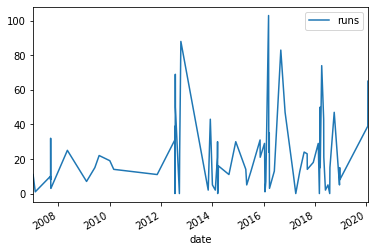

In [12]:
df.plot();

More Statistics

In [13]:
# annual total runs
df.resample('A').sum()

,runs
date,
2007-12-31,68
2008-12-31,48
2009-12-31,44
2010-12-31,33
2011-12-31,11
2012-12-31,327
2013-12-31,45
2014-12-31,126
2015-12-31,84


In [14]:
# annual mean runs
df.resample('A').mean()

,runs
date,
2007-12-31,9.714286
2008-12-31,24.000000
2009-12-31,14.666667
2010-12-31,16.500000
2011-12-31,11.000000
2012-12-31,36.333333
2013-12-31,22.500000
2014-12-31,12.600000
2015-12-31,16.800000


In [15]:
# Average runs per opposition
df.groupby('opposition').mean().sort_values(by='runs', ascending=False)

,runs
opposition,
Oman,103.000000
Netherlands,67.333333
Nepal,30.000000
Ireland,27.800000
Scotland,26.000000
Sri Lanka,23.000000
Zimbabwe,21.428571
Pakistan,20.714286
West Indies,19.769231


In [16]:
# Standard Deviation of runs per opposition
df.groupby('opposition').std().dropna().sort_values(by='runs')

,runs
opposition,
New Zealand,8.565434
South Africa,8.808140
India,9.712535
Zimbabwe,15.339026
Pakistan,16.030877
Netherlands,16.563011
Ireland,18.102486
Australia,19.091883
Afghanistan,19.362765


In [17]:
# Median runs per opposition
df.groupby('opposition').median().sort_values(by='runs', ascending=False)

,runs
opposition,
Oman,103.0
Netherlands,69.0
Ireland,31.0
Nepal,30.0
Sri Lanka,29.0
Scotland,26.0
Zimbabwe,23.0
Australia,18.5
Pakistan,18.5


In [18]:
# Top avg runs per ground
df.groupby('ground').mean().sort_values(by='runs', ascending=False).head()

,runs
ground,
Dharamsala,77.666667
The Hague,48.333333
Lauderhill,47.500000
Bengaluru,35.000000
Lahore,31.800000


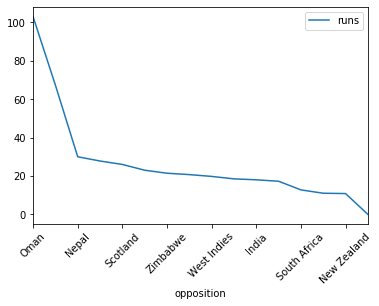

In [19]:
df.groupby('opposition').mean().sort_values(by='runs', ascending=False).plot()
plt.xticks(rotation=45);